<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793506/blob/main/IBM2/Modulo%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAESTRIA EN INTELIGENCIA ARTIFICIAL APLICADA

CIENCIA Y ANALITICA DE DATOS

CURSO IBM DATA ANALYSIS WITH PYTHON

NOMBRE: ERICK NAJERA OLIVERO

MATRICULA: A01793506

MODULO 5

### Evaluación de Modelos

La evaluación de modelos es lo que nos indica como se desempeñara nuestro modelo en el mundo real.
Esta técnica consiste en defnir en nuestro conjunto de datos de entrenamiento un porcentaje para que sean usandos como datos de prueba, es decir luego del entrenamiento, usar nuestro modelo con estos datos para tener una aproxiimación dde como sera el comportamiento de este con un nuevo conjunto de datos.


In [15]:
#Cargue de librerias y del conjunto de datos para prueba de los ejercicios
import pandas as pd
import numpy as np 

url = 'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/Cartwheeldata.csv'
df = pd.read_csv(url)
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,0
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [34]:
#Usamos la funcion train_test_split para realizar la particion del onjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df2 = df[['Height','Wingspan','CWDistance']]
df2.head()

x = df2.iloc[:,:-1]  
y = df2.iloc[:,-1] 

x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


Validación Cruzada

Es una de las medidas mas comunes de evaluacion de modelos, donde en el conjunto de entrenamiento se divide en subgrupos iguales, donde una parte de estos se usa como conjunto de validación, esto se repite hasta que cada subconjunto fue usado como validación.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
scores = cross_val_score(lr,x_train,y_train,cv=5)  
np.mean(scores)


-2.4183127279784875

In [41]:
#tambien podemos predecir usando el metodo cross_validate_predict para obtener una prediccion del conjunto usado
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lr,x_train,y_train,cv=3)
yhat # array con las predicciones


array([94.70388944, 93.60765373, 79.54394902, 78.60231269, 73.36941328,
       88.13583522, 99.37232552, 92.30758057, 92.29417621, 80.52704816,
       85.24283562, 92.3120487 , 61.77090821, 54.80535557, 86.15034243,
       74.5321721 , 62.34914194])

Sub-etrenamiento en modelos: 

Obtenemos un modelo sub-entrenado cuando este es muy simple para lograr una predicciom correcta de los datos.

Sobre-Entrenamiento: 

Obtenemos un modelo sobre-entrenado cuando este es demasiado flexible, que no solo predice con alto porcentaje sino que tambien predice los valores atipicos.

Ridge Regression

Se usa para controlar la complejidad en modelos de regresion polinomica controlando la magnitud de los coeficientes. Esto lo logra a traves del paramtro alpha, el cual entre mas alto sea, el parametro se hace mas pequeño y el modelo tiene a sobreentrenarse, Si alpha es mas pequeño, cercano a 0 el modelo tiende a subentrenarse, hay que ser cuidadoso a la hora de seleccionar el mejor alpha.

In [44]:
from sklearn.linear_model import Ridge
RM = Ridge(alpha=.1)
RM.fit(x_train,y_train)
yhat = RM.predict(x_train)
yhat


array([79.49255285, 89.49923774, 73.44394154, 91.45888306, 76.42946425,
       95.48967465, 93.50579   , 87.47657015, 87.50565735, 77.44079805,
       81.4473503 , 87.46687441, 75.4569134 , 71.45036115, 89.47984627,
       85.49268549, 76.46339933])

Grid Search

Grid search es un metodo que realiza una busqueda iterativa y automatica de los mejores hiperparametros que son utilizados para mejoras en nuestros modelos,, como por ejemplo alpha en regresion Ridge. Este metodo obtiene varios modelos aplicando varios valores de hiperparametros, selecciona que el produzca menor error MSE.

In [46]:
from sklearn.model_selection import GridSearchCV

parameters1 = [{'alpha':[0.001,0.1,10,100,1000]}]
RR = Ridge()
grid1 = GridSearchCV(RR, parameters1, cv=4)
grid1.fit(x_train,y_train)
print(grid1.best_estimator_)
scores = grid1.cv_results_
scores['mean_test_score'] 
#Obtenemos el mejor alpha econtrado=100


Ridge(alpha=100)


array([-1.08076729, -1.07520691, -0.83358423, -0.68326936, -0.73081028])

Evidencia Graded Review Questions

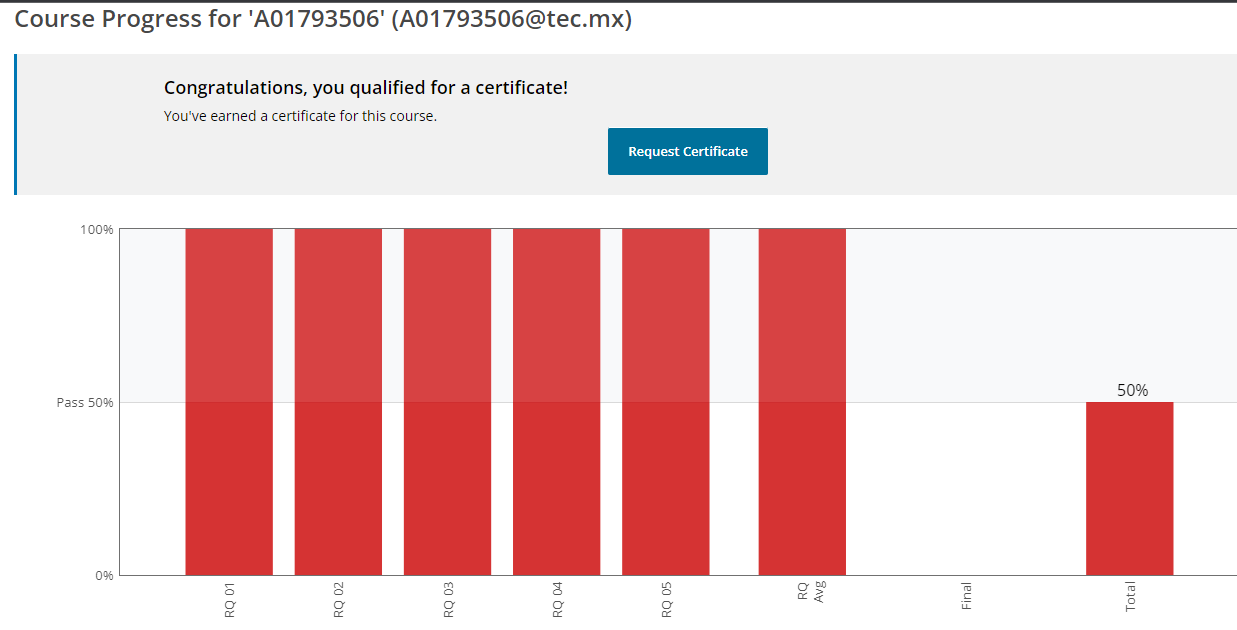